In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy, h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

In [2]:
def summ1(pc,depth):
    
    tt = depth
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,98):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,tt) * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,tt) * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,49):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,tt) * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,tt) * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        phe = al[i] + an[i]
        nn.append(phe)
        
    return nn

In [3]:
def summ3(pc):
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,98):
            if float(data_protons[j].iloc[[k], [0]].values) > pc:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = a * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = c * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,49):        
            if float(data_he[j].iloc[[k], [0]].values) > pc:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = a * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = c * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        phe = an[i] / al[i]
        nn.append(phe)
          
    return nn

In [4]:
def summ4(ener):
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')
    
    al = []
    s1 = 0
    
    for j in data_protons:
        for k in range(0,98):
            if float(data_protons[j].iloc[[k], [4]].values) > ener:            
                a = float(data_protons[j].iloc[[k], [4]].values)
                b = a * float(data_protons[j].iloc[[k], [6]].values)
                c = float(data_protons[j].iloc[[k+1], [4]].values)
                d = c * float(data_protons[j].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        al.append(s1)
        s1 = 0
        
    s2 = 0
    an = []
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()
    
    for j in data_he:
        for k in range(0,49):        
            if float(data_he[j].iloc[[k], [4]].values) > ener:
                a = float(data_he[j].iloc[[k], [4]].values)
                b = a * float(data_he[j].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[j].iloc[[k+1], [4]].values)
                d = c * float(data_he[j].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        an.append(4*s2)
        s2 = 0
    nn = []
    
    for i in range(len(an)):
        phe = an[i] / al[i]
        nn.append(phe)
 
    return nn

In [5]:
time = load_obj('time_PAM_CR')
t = []
for j in range(0,51):
    a = float(time.iloc[[j], [2]].values)
    t.append(a)

In [6]:
n57 = summ1(6.90668,886.94)
nn57 = []
for i in n57:
    nn57.append(i/(sum(n57)/len(n57)))
n010 = summ1(0,1025.07)
nn010 = []
for i in n010:
    nn010.append(i/(sum(n010)/len(n010)))

Text(0, 0.5, '$NM_{1}/NM_{2}$')

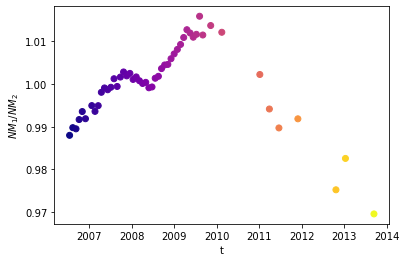

In [7]:
nnn=[]
for i in range(len(n57)):
    a=nn010[i]/nn57[i]
    nnn.append(a)
    
fig = plt.figure()
plt.scatter(t, nnn, c=t, cmap="plasma")
plt.xlabel('t')
plt.ylabel('$NM_{1}/NM_{2}$')

In [8]:
phee1 = summ4(1.7)

In [9]:
#это He/p AMS-02 тоже для 1.7 ГэВ/нуклон
tams = [2011.3671232876711, 2011.441095890411, 2011.5150684931507, 2011.5890410958905, 2011.66301369863, 2011.7369863013698, 2011.8109589041096, 2011.8849315068494, 2011.958904109589, 2012.032786885246, 2012.1065573770493, 2012.1803278688524, 2012.2540983606557, 2012.327868852459, 2012.4016393442623, 2012.4754098360656, 2012.549180327869, 2012.622950819672, 2012.6967213114754, 2012.7704918032787, 2012.844262295082, 2012.9180327868853, 2012.9918032786886, 2013.0657534246575, 2013.1397260273973, 2013.213698630137, 2013.2876712328766, 2013.3616438356164, 2013.4356164383562, 2013.509589041096, 2013.5835616438355, 2013.6575342465753, 2013.731506849315, 2013.805479452055, 2013.8794520547945, 2013.9534246575342, 2014.027397260274, 2014.1013698630136, 2014.1753424657534, 2014.2493150684932, 2014.323287671233, 2014.3972602739725, 2014.4712328767123, 2014.545205479452, 2014.6191780821919, 2014.6931506849314, 2014.9150684931508, 2014.9890410958903, 2015.0630136986301, 2015.13698630137, 2015.2109589041097, 2015.2849315068493, 2015.358904109589, 2015.4328767123288, 2015.5068493150684, 2015.5808219178082, 2015.654794520548, 2015.7287671232878, 2015.8027397260273, 2015.876712328767, 2015.9506849315069, 2016.0245901639344, 2016.0983606557377, 2016.172131147541, 2016.2459016393443, 2016.3196721311476, 2016.3934426229507, 2016.467213114754, 2016.5409836065573, 2016.6147540983607, 2016.688524590164, 2016.7622950819673, 2016.8360655737704, 2016.9098360655737, 2016.983606557377, 2017.0575342465754, 2017.131506849315, 2017.2054794520548, 2017.2794520547945]
ttotal = t + tams
hepams = [0.3978772342344187, 0.4014441338884507, 0.39904524887629605, 0.3999550936141118, 0.396522601321108, 0.40286423481779443, 0.39930179502458546, 0.3960247438155632, 0.3966917751298819, 0.39912971794279334, 0.4010284070293145, 0.4122108723764083, 0.4018180716564586, 0.3996802313088284, 0.4047560636409918, 0.407065663099444, 0.4168802304885591, 0.4157202141305924, 0.4099841595944753, 0.41228825310136025, 0.41177010034650957, 0.40825897781513903, 0.4063962270593539, 0.4040573659861581, 0.4058360671135769, 0.41005385210102063, 0.4095258040323683, 0.4189290468507673, 0.42011022725763225, 0.4180615922274645, 0.4198331385797932, 0.41827369195467945, 0.41473307950089977, 0.41460293715891516, 0.41703009557905707, 0.41672027697940156, 0.4169317641308618, 0.42392571057598033, 0.4181080244793892, 0.4190452564558462, 0.41584163314110567, 0.4169957582204724, 0.41858628896819566, 0.41366370296817045, 0.4102913376415799, 0.4112188275582524, 0.4122668060439256, 0.41366222710300027, 0.4126878898296164, 0.41601270256932, 0.4230711047038617, 0.4184968979409504, 0.4114393581594686, 0.4128706628927561, 0.4092543033634407, 0.40745504361613205, 0.40681416976663437, 0.406674301160442, 0.4055643324154414, 0.40103499674768206, 0.3991391847436099, 0.39569448835137344, 0.39506049051815645, 0.39524938707666807, 0.39407554921684274, 0.39300899099803016, 0.39041098059066726, 0.3918474134752235, 0.3908256144058218, 0.3921314859485911, 0.38889662782374834, 0.3865343627393654, 0.38502994263782175, 0.384629409560202, 0.3849225748452245, 0.38370112672465106, 0.3837797551671677, 0.38319490970402603, 0.38551633705904526]
heptotal = phee1 + hepams

Text(0.5, 0, 'time')

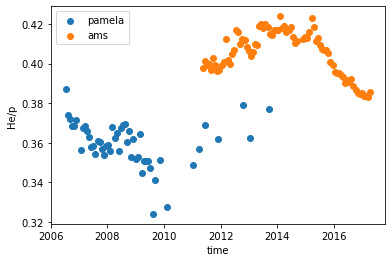

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from colorspacious import cspace_converter

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)
plt.scatter(t, phee1, cmap="plasma")
plt.scatter(tams, hepams, cmap="plasma")
plt.legend(["pamela", "ams"])
plt.ylabel('He/p')
plt.xlabel('time')